# **Milestone 1: Data Foundation and Cleaning**

This first milestone is centered around Exploratory Data Analysis (EDA), which is a crucial first step in any data analysis project.



---


**Week 1: Project Initialization and Dataset Setup**

    • 1.1. Define goals, KPIs, and workflow

    • 1.2. Load CSVs using pandas

    • 1.3. Explore schema, types, size, and nulls

    • 1.4. Perform sampling and memory optimizations


---











---


**Week 2: Preprocessing and Feature Engineering**

    • 2.1. Handle nulls in delay and cancellation columns

    • 2.2. Create derived features: Month, Day of Week, Hour, Route

    • 2.3. Format datetime columns

    • 2.4. Save preprocessed data for fast reuse


---











---



**1.1. Define goals, KPIs, and workflow**

**Goals**



1.   **Primary Goal:**


    *   To develop a comprehensive understanding of the characteristics of the flight delay and cancellation dataset. This involves cleaning the data, exploring its structure, and summarizing its main features.



2.  **Secondary Goals:**


    * Identify the key factors that are most strongly correlated with flight delays and cancellations.

    * Generate initial, data-driven hypotheses about the causes of flight delays and cancellations. For example, certain airlines are more prone to delays or that delays are more common during specific times of the year.

    * Prepare a clean and well-documented dataset that can be used for more advanced analysis and predictive modeling in subsequent project milestones.



3. Key Performance Indicators (KPIs)

       KPIs will help you measure the success of your first milestone.

         * Data Quality

         * Missing Values Addressed
     
         * Data Cleaning Completeness

         * Feature Extraction




---










---

**1.2. Load CSVs / Dataset**


---



In [ ]:
#Can run directly without uploading dataset

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "flights_sample_3m.csv" # Added a placeholder filename

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "patrickzel/flight-delay-and-cancellation-dataset-2019-2023",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1359426439.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 140M/140M [00:01<00:00, 109MB/s]

Extracting zip of flights_sample_3m.csv...


First 5 records:       FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0  2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1  2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2  2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3  2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4  2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
0             Newark, NJ  ...       0.0             186.0         176.0 



---


**1.3. Explore schema, types, size, and nulls**


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [ ]:
df.isnull().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_DOT,0
AIRLINE_CODE,0
DOT_CODE,0
FL_NUMBER,0
ORIGIN,0
ORIGIN_CITY,0
DEST,0
DEST_CITY,0


In [ ]:
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [ ]:
df.shape,df.columns

((3000000, 32),
 Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
        'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
        'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
        'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
        'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
        'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
        'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
        'DELAY_DUE_LATE_AIRCRAFT'],
       dtype='object'))

In [ ]:
df.head(100)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-25,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1376,CLT,"Charlotte, NC",EWR,"Newark, NJ",...,0.0,111.0,114.0,77.0,529.0,NaN,NaN,NaN,NaN,NaN
96,2023-06-22,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1359,BNA,"Nashville, TN",MCO,"Orlando, FL",...,0.0,110.0,104.0,83.0,616.0,NaN,NaN,NaN,NaN,NaN
97,2019-12-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1950,MCO,"Orlando, FL",LGA,"New York, NY",...,0.0,155.0,152.0,120.0,950.0,20.0,0.0,0.0,0.0,0.0
98,2019-07-01,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,695,BWI,"Baltimore, MD",LAS,"Las Vegas, NV",...,0.0,302.0,283.0,263.0,2106.0,NaN,NaN,NaN,NaN,NaN




---

**1.4. Perform sampling and memory optimizations**


---



In [ ]:
# Memory usage in bytes
print(df.memory_usage(deep=True))

# Total memory usage
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Index                            132
FL_DATE                    177000000
AIRLINE                    205780958
AIRLINE_DOT                217780958
AIRLINE_CODE               153000000
DOT_CODE                    24000000
FL_NUMBER                   24000000
ORIGIN                     156000000
ORIGIN_CITY                186344126
DEST                       156000000
DEST_CITY                  186346403
CRS_DEP_TIME                24000000
DEP_TIME                    24000000
DEP_DELAY                   24000000
TAXI_OUT                    24000000
WHEELS_OFF                  24000000
WHEELS_ON                   24000000
TAXI_IN                     24000000
CRS_ARR_TIME                24000000
ARR_TIME                    24000000
ARR_DELAY                   24000000
CANCELLED                   24000000
CANCELLATION_CODE           97424520
DIVERTED                    24000000
CRS_ELAPSED_TIME            24000000
ELAPSED_TIME                24000000
AIR_TIME                    24000000
D

In [ ]:
# Downcast integers
import numpy as np
import pandas as pd

int_cols = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DOT_CODE', 'FL_NUMBER']
df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

# Downcast floats
float_cols = [
    'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
    'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED',
    'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT'
]
df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

In [ ]:
cols_to_category = [

    'CANCELLATION_CODE'
]

for col in cols_to_category:
    df[col] = df[col].astype('category')

In [ ]:
# Memory usage in bytes
print(df.memory_usage(deep=True))

# Total memory usage
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Index                            132
FL_DATE                    177000000
AIRLINE                    205780958
AIRLINE_DOT                217780958
AIRLINE_CODE               153000000
DOT_CODE                     6000000
FL_NUMBER                    6000000
ORIGIN                     156000000
ORIGIN_CITY                186344126
DEST                       156000000
DEST_CITY                  186346403
CRS_DEP_TIME                 6000000
DEP_TIME                    12000000
DEP_DELAY                   12000000
TAXI_OUT                    12000000
WHEELS_OFF                  12000000
WHEELS_ON                   12000000
TAXI_IN                     12000000
CRS_ARR_TIME                 6000000
ARR_TIME                    12000000
ARR_DELAY                   12000000
CANCELLED                   12000000
CANCELLATION_CODE            3000372
DIVERTED                    12000000
CRS_ELAPSED_TIME            12000000
ELAPSED_TIME                12000000
AIR_TIME                    12000000
D



---

**2.2. Create derived features: Month, Day of Week**


---



In [ ]:
import pandas as pd

# Convert to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [ ]:
# Extract Year, Quarter, Month Name, Day of Week
df['Year'] = df['FL_DATE'].dt.year
df['Quarter'] = df['FL_DATE'].dt.quarter
df['Month'] = df['FL_DATE'].dt.month_name()  # Month name instead of number
df['Day_of_Week'] = df['FL_DATE'].dt.day_name()

print(df)

           FL_DATE                 AIRLINE                 AIRLINE_DOT  \
0       2019-01-09   United Air Lines Inc.   United Air Lines Inc.: UA   
1       2022-11-19    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2       2022-07-22   United Air Lines Inc.   United Air Lines Inc.: UA   
3       2023-03-06    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
4       2020-02-23        Spirit Air Lines        Spirit Air Lines: NK   
...            ...                     ...                         ...   
2999995 2022-11-13  American Airlines Inc.  American Airlines Inc.: AA   
2999996 2022-11-02  American Airlines Inc.  American Airlines Inc.: AA   
2999997 2022-09-11    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2999998 2019-11-13        Republic Airline        Republic Airline: YX   
2999999 2019-06-15  Southwest Airlines Co.  Southwest Airlines Co.: WN   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0                 UA     19977   

In [ ]:

# Count number of years in dataset
num_years = df['Year'].nunique()
print(f"Number of years in dataset: {num_years}")

# Check how many months are present in each year
months_per_year = df.groupby('Year')['Month'].nunique()
print("\nNumber of months per year:")
print(months_per_year)

# Optional: see missing months for each year
all_months = set(range(1, 13))
missing_months = {year: sorted(all_months - set(df[df['Year'] == year]['Month'].unique()))
                  for year in df['Year'].unique()}
print("\nMissing months per year (if any):")
print(missing_months)

Number of years in dataset: 5

Number of months per year:
Year
2019    12
2020    12
2021    12
2022    12
2023     8
Name: Month, dtype: int64

Missing months per year (if any):
{np.int32(2019): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.int32(2022): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.int32(2023): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.int32(2020): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.int32(2021): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}


In [ ]:

# Count rows for year 2023
rows_2023 = df[df['Year'] == 2023].shape[0]
print(f"Number of rows for 2023: {rows_2023}")


Number of rows for 2023: 463484


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 36 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   FL_DATE                  datetime64[ns]
 1   AIRLINE                  object        
 2   AIRLINE_DOT              object        
 3   AIRLINE_CODE             object        
 4   DOT_CODE                 int16         
 5   FL_NUMBER                int16         
 6   ORIGIN                   object        
 7   ORIGIN_CITY              object        
 8   DEST                     object        
 9   DEST_CITY                object        
 10  CRS_DEP_TIME             int16         
 11  DEP_TIME                 float32       
 12  DEP_DELAY                float32       
 13  TAXI_OUT                 float32       
 14  WHEELS_OFF               float32       
 15  WHEELS_ON                float32       
 16  TAXI_IN                  float32       
 17  CRS_ARR_TIME             in



---

**2.1. Handle nulls in delay and cancellation columns**


---


**2.3. Format datetime columns**


---



In [ ]:
import pandas as pd

# Assuming your dataframe is df
cols_to_duplicate = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Duplicate with suffix "_COPY"
for col in cols_to_duplicate:
    df[col + "_(COPY)"] = df[col]

# Check
print(df.head())

     FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0 2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1 2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2 2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3 2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4 2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...  DELAY_DUE_LATE_AIRCRAFT  Year  Quarter  \
0             Newark, NJ  ...                      NaN  2019        1   
1            Seattle, WA

In [ ]:
import pandas as pd
import numpy as np

cols_to_check = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

summary = {}

for col in cols_to_check:
    summary[col] = {
        "Positive (>0)": (df[col] > 0).sum(),
        "Negative (<0)": (df[col] < 0).sum(),
        "Equal to 0": (df[col] == 0).sum(),
        "NaN/Null": df[col].isna().sum()
    }

# Convert to DataFrame for better display
summary_df = pd.DataFrame(summary).T
print(summary_df)


                         Positive (>0)  Negative (<0)  Equal to 0  NaN/Null
DELAY_DUE_CARRIER               296951              0      236912   2466137
DELAY_DUE_WEATHER                31428              0      502435   2466137
DELAY_DUE_NAS                   256477              0      277386   2466137
DELAY_DUE_SECURITY                2759              0      531104   2466137
DELAY_DUE_LATE_AIRCRAFT         259014              0      274849   2466137


In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame (your df already exists)
# df = pd.read_csv("flights.csv")

cols_to_format = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

# Function to format column names nicely
def format_col_name(col):
    return col.replace("DELAY_DUE_", "Delay due to ").replace("_", " ").title()

# Apply transformation
for col in cols_to_format:
    formatted_text = format_col_name(col)
    df[col] = df[col].apply(lambda x: formatted_text if pd.notnull(x) and x > 0 else x)

# Check result
print(df[cols_to_format].head(100))

       DELAY_DUE_CARRIER DELAY_DUE_WEATHER     DELAY_DUE_NAS  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               NaN   
3                    0.0               0.0  Delay Due To Nas   
4                    NaN               NaN               NaN   
..                   ...               ...               ...   
95                   NaN               NaN               NaN   
96                   NaN               NaN               NaN   
97  Delay Due To Carrier               0.0               0.0   
98                   NaN               NaN               NaN   
99                   NaN               NaN               NaN   

   DELAY_DUE_SECURITY DELAY_DUE_LATE_AIRCRAFT  
0                 NaN                     NaN  
1                 NaN                     NaN  
2                 NaN                     NaN  
3                 0.0                  

In [ ]:
df.head(100)
df.iloc[:200, -10:]

,DELAY_DUE_LATE_AIRCRAFT,Year,Quarter,Month,Day_of_Week,DELAY_DUE_CARRIER_(COPY),DELAY_DUE_WEATHER_(COPY),DELAY_DUE_NAS_(COPY),DELAY_DUE_SECURITY_(COPY),DELAY_DUE_LATE_AIRCRAFT_(COPY)
0,NaN,2019,1,January,Wednesday,NaN,NaN,NaN,NaN,NaN
1,NaN,2022,4,November,Saturday,NaN,NaN,NaN,NaN,NaN
2,NaN,2022,3,July,Friday,NaN,NaN,NaN,NaN,NaN
3,0.0,2023,1,March,Monday,0.0,0.0,24.0,0.0,0.0
4,NaN,2020,1,February,Sunday,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
195,NaN,2021,4,October,Monday,NaN,NaN,NaN,NaN,NaN
196,NaN,2021,2,May,Monday,NaN,NaN,NaN,NaN,NaN
197,Delay Due To Late Aircraft,2019,2,April,Sunday,25.0,0.0,37.0,0.0,1.0
198,NaN,2021,2,May,Tuesday,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

cols_to_merge = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

def combine_reasons(row):
    reasons = []
    for col in cols_to_merge:
        val = row[col]
        # Keep only strings that are not null/0
        if isinstance(val, str) and "Delay" in val:
            reasons.append(val.strip())
    return ", ".join(reasons) if reasons else np.nan

df["Delay_Reasons"] = df.apply(combine_reasons, axis=1)

# Check result
print(df[["Delay_Reasons"]].head(20))

           Delay_Reasons
0                    NaN
1                    NaN
2                    NaN
3       Delay Due To Nas
4                    NaN
5   Delay Due To Carrier
6                    NaN
7       Delay Due To Nas
8                    NaN
9                    NaN
10  Delay Due To Carrier
11                   NaN
12                   NaN
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                   NaN
19      Delay Due To Nas


In [ ]:
df.iloc[:200, -11:]

,DELAY_DUE_LATE_AIRCRAFT,Year,Quarter,Month,Day_of_Week,DELAY_DUE_CARRIER_(COPY),DELAY_DUE_WEATHER_(COPY),DELAY_DUE_NAS_(COPY),DELAY_DUE_SECURITY_(COPY),DELAY_DUE_LATE_AIRCRAFT_(COPY),Delay_Reasons
0,NaN,2019,1,January,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2022,4,November,Saturday,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2022,3,July,Friday,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2023,1,March,Monday,0.0,0.0,24.0,0.0,0.0,Delay Due To Nas
4,NaN,2020,1,February,Sunday,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,2021,4,October,Monday,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,2021,2,May,Monday,NaN,NaN,NaN,NaN,NaN,NaN
197,Delay Due To Late Aircraft,2019,2,April,Sunday,25.0,0.0,37.0,0.0,1.0,"Delay Due To Carrier, Delay Due To Nas, Delay ..."
198,NaN,2021,2,May,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Year', 'Quarter', 'Month', 'Day_of_Week',
       'DELAY_DUE_CARRIER_(COPY)', 'DELAY_DUE_WEATHER_(COPY)',
       'DELAY_DUE_NAS_(COPY)', 'DELAY_DUE_SECURITY_(COPY)',
       'DELAY_DUE_LATE_AIRCRAFT_(COPY)', 'Delay_Reasons'],
      dtype='object')

In [ ]:
# # Replace NaN/Null in Delay_Reasons with "No Delay"
# df["Delay_Reasons"] = df["Delay_Reasons"].fillna("No Delay")

# # Check result
# print(df["Delay_Reasons"].head(20))

In [ ]:
cols = [
    'DELAY_DUE_CARRIER_(COPY)',
    'DELAY_DUE_WEATHER_(COPY)',
    'DELAY_DUE_NAS_(COPY)',
    'DELAY_DUE_SECURITY_(COPY)',
    'DELAY_DUE_LATE_AIRCRAFT_(COPY)'
]

df[cols] = df[cols].fillna(0)

In [ ]:
delay_cols_copy = [
    'DELAY_DUE_CARRIER_(COPY)',
    'DELAY_DUE_WEATHER_(COPY)',
    'DELAY_DUE_NAS_(COPY)',
    'DELAY_DUE_SECURITY_(COPY)',
    'DELAY_DUE_LATE_AIRCRAFT_(COPY)'
]

# Sum row-wise across the columns
df["Total_Delay_in_Minutes"] = df[delay_cols_copy].sum(axis=1)

# Check result
print(df[["Total_Delay_in_Minutes"]].head(20))

    Total_Delay_in_Minutes
0                      0.0
1                      0.0
2                      0.0
3                     24.0
4                      0.0
5                    141.0
6                      0.0
7                     23.0
8                      0.0
9                      0.0
10                    60.0
11                     0.0
12                     0.0
13                     0.0
14                     0.0
15                     0.0
16                     0.0
17                     0.0
18                     0.0
19                    35.0


In [ ]:
df.iloc[:200, -11:]

,Year,Quarter,Month,Day_of_Week,DELAY_DUE_CARRIER_(COPY),DELAY_DUE_WEATHER_(COPY),DELAY_DUE_NAS_(COPY),DELAY_DUE_SECURITY_(COPY),DELAY_DUE_LATE_AIRCRAFT_(COPY),Delay_Reasons,Total_Delay_in_Minutes
0,2019,1,January,Wednesday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,2022,4,November,Saturday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,2022,3,July,Friday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,2023,1,March,Monday,0.0,0.0,24.0,0.0,0.0,Delay Due To Nas,24.0
4,2020,1,February,Sunday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,2021,4,October,Monday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
196,2021,2,May,Monday,0.0,0.0,0.0,0.0,0.0,NaN,0.0
197,2019,2,April,Sunday,25.0,0.0,37.0,0.0,1.0,"Delay Due To Carrier, Delay Due To Nas, Delay ...",63.0
198,2021,2,May,Tuesday,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [ ]:
import pandas as pd

# Convert minutes into timedelta (time format)
df["Total_Delay_in_Time"] = pd.to_timedelta(df["Total_Delay_in_Minutes"], unit="m")

# Format as HH:MM:SS (string)
df["Total_Delay_in_Time"] = df["Total_Delay_in_Time"].apply(lambda x: str(x).split()[-1] if pd.notnull(x) else None)

# Check result
print(df[["Total_Delay_in_Minutes", "Total_Delay_in_Time"]].head(20))

    Total_Delay_in_Minutes Total_Delay_in_Time
0                      0.0            00:00:00
1                      0.0            00:00:00
2                      0.0            00:00:00
3                     24.0            00:24:00
4                      0.0            00:00:00
5                    141.0            02:21:00
6                      0.0            00:00:00
7                     23.0            00:23:00
8                      0.0            00:00:00
9                      0.0            00:00:00
10                    60.0            01:00:00
11                     0.0            00:00:00
12                     0.0            00:00:00
13                     0.0            00:00:00
14                     0.0            00:00:00
15                     0.0            00:00:00
16                     0.0            00:00:00
17                     0.0            00:00:00
18                     0.0            00:00:00
19                    35.0            00:35:00


In [ ]:
# Delete the column 'Total_Delay_in_Minutes' inplace
df.drop(columns=['Total_Delay_in_Minutes'], inplace=True)

In [ ]:
import numpy as np

# Create DELAYED column
df['DELAYED'] = np.where(df['Delay_Reasons'].notnull(), 'Delay', 'No Delay')

# Optional: check
df[['Delay_Reasons', 'DELAYED']].head(10)

,Delay_Reasons,DELAYED
0,NaN,No Delay
1,NaN,No Delay
2,NaN,No Delay
3,Delay Due To Nas,Delay
4,NaN,No Delay
5,Delay Due To Carrier,Delay
6,NaN,No Delay
7,Delay Due To Nas,Delay
8,NaN,No Delay
9,NaN,No Delay


In [ ]:
# List of delay columns
delay_cols = [
    'DELAY_DUE_CARRIER_(COPY)',
    'DELAY_DUE_WEATHER_(COPY)',
    'DELAY_DUE_NAS_(COPY)',
    'DELAY_DUE_SECURITY_(COPY)',
    'DELAY_DUE_LATE_AIRCRAFT_(COPY)'
]

# Convert in-place: minutes → HH:MM:SS string
for col in delay_cols:
    df[col] = pd.to_timedelta(df[col], unit="m").dt.components.apply(
        lambda row: f"{int(row.hours):02}:{int(row.minutes):02}:{int(row.seconds):02}", axis=1
    )

# Check result
print(df[delay_cols].head(10))


  DELAY_DUE_CARRIER_(COPY) DELAY_DUE_WEATHER_(COPY) DELAY_DUE_NAS_(COPY)  \
0                 00:00:00                 00:00:00             00:00:00   
1                 00:00:00                 00:00:00             00:00:00   
2                 00:00:00                 00:00:00             00:00:00   
3                 00:00:00                 00:00:00             00:24:00   
4                 00:00:00                 00:00:00             00:00:00   
5                 02:21:00                 00:00:00             00:00:00   
6                 00:00:00                 00:00:00             00:00:00   
7                 00:00:00                 00:00:00             00:23:00   
8                 00:00:00                 00:00:00             00:00:00   
9                 00:00:00                 00:00:00             00:00:00   

  DELAY_DUE_SECURITY_(COPY) DELAY_DUE_LATE_AIRCRAFT_(COPY)  
0                  00:00:00                       00:00:00  
1                  00:00:00              

In [ ]:
df.rename(columns={
    'DELAY_DUE_CARRIER_(COPY)': 'DELAY_DUE_CARRIER_in_mins',
    'DELAY_DUE_WEATHER_(COPY)': 'DELAY_DUE_WEATHER_in_mins',
    'DELAY_DUE_NAS_(COPY)': 'DELAY_DUE_NAS_in_mins',
    'DELAY_DUE_SECURITY_(COPY)': 'DELAY_DUE_SECURITY_in_mins',
    'DELAY_DUE_LATE_AIRCRAFT_(COPY)': 'DELAY_DUE_LATE_AIRCRAFT_in_mins'
}, inplace=True)

In [ ]:
cols_to_drop = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df.drop(columns=cols_to_drop, inplace=True)

# Check remaining columns
print(df.head())

     FL_DATE                AIRLINE                AIRLINE_DOT AIRLINE_CODE  \
0 2019-01-09  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
1 2022-11-19   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
2 2022-07-22  United Air Lines Inc.  United Air Lines Inc.: UA           UA   
3 2023-03-06   Delta Air Lines Inc.   Delta Air Lines Inc.: DL           DL   
4 2020-02-23       Spirit Air Lines       Spirit Air Lines: NK           NK   

   DOT_CODE  FL_NUMBER ORIGIN          ORIGIN_CITY DEST  \
0     19977       1562    FLL  Fort Lauderdale, FL  EWR   
1     19790       1149    MSP      Minneapolis, MN  SEA   
2     19977        459    DEN           Denver, CO  MSP   
3     19790       2295    MSP      Minneapolis, MN  SFO   
4     20416        407    MCO          Orlando, FL  DFW   

               DEST_CITY  ...     Month  Day_of_Week  \
0             Newark, NJ  ...   January    Wednesday   
1            Seattle, WA  ...  November     Saturday   
2 

In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'Year', 'Quarter', 'Month',
       'Day_of_Week', 'DELAY_DUE_CARRIER_in_mins', 'DELAY_DUE_WEATHER_in_mins',
       'DELAY_DUE_NAS_in_mins', 'DELAY_DUE_SECURITY_in_mins',
       'DELAY_DUE_LATE_AIRCRAFT_in_mins', 'Delay_Reasons',
       'Total_Delay_in_Time', 'DELAYED'],
      dtype='object')

In [ ]:
df.shape

(3000000, 39)

In [ ]:
# from google.colab import files

# # Save
# df.to_csv("processed_flights.csv", index=False)





---

**(Continue) 2.2. Create derived features: Route**


---



In [ ]:
df[['ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']].head(300)

,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY
0,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ"
1,MSP,"Minneapolis, MN",SEA,"Seattle, WA"
2,DEN,"Denver, CO",MSP,"Minneapolis, MN"
3,MSP,"Minneapolis, MN",SFO,"San Francisco, CA"
4,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX"
...,...,...,...,...
295,TPA,"Tampa, FL",BWI,"Baltimore, MD"
296,ORD,"Chicago, IL",CVG,"Cincinnati, OH"
297,ORD,"Chicago, IL",PWM,"Portland, ME"
298,CLT,"Charlotte, NC",SAV,"Savannah, GA"




---

**Other Preprocessing Steps**


---



In [ ]:
# Create ROUTE column with City Names
df['ROUTE'] = df['ORIGIN_CITY'] + " → " + df['DEST_CITY']

# Preview unique values
print(df['ROUTE'].head(10))

0       Fort Lauderdale, FL → Newark, NJ
1          Minneapolis, MN → Seattle, WA
2           Denver, CO → Minneapolis, MN
3    Minneapolis, MN → San Francisco, CA
4    Orlando, FL → Dallas/Fort Worth, TX
5         Dallas, TX → Oklahoma City, OK
6            Washington, DC → Boston, MA
7        Huntsville, AL → Washington, DC
8          Houston, TX → Los Angeles, CA
9            Seattle, WA → Fairbanks, AK
Name: ROUTE, dtype: object


In [ ]:
!pip install us

import us

# Extract state code from OriginCityName
df['ORIGIN_STATE'] = df['ORIGIN_CITY'].str.split(',').str[1].str.strip()

# Map using us library (abbreviation → full name)
df['ORIGIN_STATE'] = df['ORIGIN_STATE'].apply(
    lambda x: us.states.lookup(x).name if us.states.lookup(x) else x
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.9/355.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
df['ORIGIN_STATE'].value_counts()

,count
ORIGIN_STATE,
Texas,326015
California,316863
Florida,259713
Georgia,165211
Illinois,164665
New York,146260
Colorado,135091
North Carolina,133987
Arizona,87179


In [ ]:
# Replace TT and DC with full names
df['ORIGIN_STATE'] = df['ORIGIN_STATE'].replace({
    'TT': 'U.S. Territories',
    'DC': 'Washington, District of Columbia'
})

In [ ]:
df['ORIGIN_STATE'].value_counts()

,count
ORIGIN_STATE,
Texas,326015
California,316863
Florida,259713
Georgia,165211
Illinois,164665
New York,146260
Colorado,135091
North Carolina,133987
Arizona,87179


In [ ]:
# Extract state code from DEST_CITY
df['DEST_STATE'] = df['DEST_CITY'].str.split(',').str[1].str.strip()

# Map using us library (abbreviation → full name)
df['DEST_STATE'] = df['DEST_STATE'].apply(
    lambda x: us.states.lookup(x).name if us.states.lookup(x) else x
)

In [ ]:
df['DEST_STATE'].value_counts()

,count
DEST_STATE,
Texas,325301
California,316469
Florida,260353
Illinois,165395
Georgia,164952
New York,145339
North Carolina,135112
Colorado,134989
Arizona,88167


In [ ]:
# Replace TT and DC with full names
df['DEST_STATE'] = df['DEST_STATE'].replace({
    'TT': 'U.S. Territories',
    'DC': 'Washington, District of Columbia'
})

In [ ]:
df['DEST_STATE'].value_counts()

,count
DEST_STATE,
Texas,325301
California,316469
Florida,260353
Illinois,165395
Georgia,164952
New York,145339
North Carolina,135112
Colorado,134989
Arizona,88167


In [ ]:
# Keep only the city name (before the comma) for ORIGIN_CITY and DEST_CITY
df['ORIGIN_CITY'] = df['ORIGIN_CITY'].str.split(',').str[0].str.strip()
df['DEST_CITY']   = df['DEST_CITY'].str.split(',').str[0].str.strip()

In [ ]:
df.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_WEATHER_in_mins,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,...,00:00:00,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,Dallas,OKC,Oklahoma City,...,00:00:00,00:00:00,00:00:00,00:00:00,Delay Due To Carrier,02:21:00,Delay,"Dallas, TX → Oklahoma City, OK",Texas,Oklahoma
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,Washington,BOS,Boston,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Washington, DC → Boston, MA","Washington, District of Columbia",Massachusetts
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,Huntsville,DCA,Washington,...,00:00:00,00:23:00,00:00:00,00:00:00,Delay Due To Nas,00:23:00,Delay,"Huntsville, AL → Washington, DC",Alabama,"Washington, District of Columbia"
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,Houston,LAX,Los Angeles,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Houston, TX → Los Angeles, CA",Texas,California
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,Seattle,FAI,Fairbanks,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Seattle, WA → Fairbanks, AK",Washington,Alaska


In [ ]:
df['CANCELLATION_CODE'].value_counts()

,count
CANCELLATION_CODE,
B,28772
D,24417
A,19476
C,6475


In [ ]:
# https://www.law.cornell.edu/cfr/text/14/234.4?utm_source=chatgpt.com

# Map the cancellation codes with expanded descriptions
cancel_map = {
    "A": "A (Air Carrier)",
    "B": "B (Extreme Weather)",
    "C": "C (National Aviation System (NAS))",
    "D": "D (Security)"
}

# Apply mapping
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].map(cancel_map)

In [ ]:
df['CANCELLATION_CODE'].isna().sum()

np.int64(2920860)

In [ ]:
df['CANCELLATION_CODE'].unique()

[NaN, 'D (Security)', 'B (Extreme Weather)', 'A (Air Carrier)', 'C (National Aviation System (NAS))']
Categories (4, object): ['A (Air Carrier)', 'B (Extreme Weather)',
                         'C (National Aviation System (NAS))', 'D (Security)']

In [ ]:
df.rename(columns={
    'ORIGIN': 'ORIGIN (IATA CODE)',
    'DEST': 'DEST (IATA CODE)'
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 42 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FL_DATE                          datetime64[ns]
 1   AIRLINE                          object        
 2   AIRLINE_DOT                      object        
 3   AIRLINE_CODE                     object        
 4   DOT_CODE                         int16         
 5   FL_NUMBER                        int16         
 6   ORIGIN (IATA CODE)               object        
 7   ORIGIN_CITY                      object        
 8   DEST (IATA CODE)                 object        
 9   DEST_CITY                        object        
 10  CRS_DEP_TIME                     int16         
 11  DEP_TIME                         float32       
 12  DEP_DELAY                        float32       
 13  TAXI_OUT                         float32       
 14  WHEELS_OFF                       f

In [ ]:
df['DISTANCE']

,DISTANCE
0,1065.0
1,1399.0
2,680.0
3,1589.0
4,985.0
...,...
2999995,328.0
2999996,977.0
2999997,151.0
2999998,184.0


In [ ]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN (IATA CODE),ORIGIN_CITY,DEST (IATA CODE),DEST_CITY,...,DELAY_DUE_WEATHER_in_mins,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,...,00:00:00,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,...,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas


In [ ]:
df.rename(columns={'DISTANCE': 'DISTANCE_IN_MILES'}, inplace=True)

In [ ]:
df['DISTANCE_IN_MILES'].isna().sum()

np.int64(0)

In [ ]:
mean_dist = df['DISTANCE_IN_MILES'].mean()
std_dist = df['DISTANCE_IN_MILES'].std()
print(mean_dist, std_dist)

809.3613 587.0297241210938


In [ ]:
q1 = df['DISTANCE_IN_MILES'].quantile(0.33)
q2 = df['DISTANCE_IN_MILES'].quantile(0.66)
print(q1, q2)

456.0 909.0


In [ ]:
min_dist = df['DISTANCE_IN_MILES'].min()
max_dist = df['DISTANCE_IN_MILES'].max()
print(min_dist, max_dist)

29.0 5812.0


In [ ]:
# Define thresholds
q1 = 456
q2 = 909

# Count values in each range
short_count = df[df['DISTANCE_IN_MILES'] <= q1].shape[0]
medium_count = df[(df['DISTANCE_IN_MILES'] > q1) & (df['DISTANCE_IN_MILES'] <= q2)].shape[0]
long_count = df[df['DISTANCE_IN_MILES'] > q2].shape[0]

print("≤ 456 miles:", short_count)
print("457 – 909 miles:", medium_count)
print("> 909 miles:", long_count)

≤ 456 miles: 990498
457 – 909 miles: 992174
> 909 miles: 1017328


In [ ]:
# Define thresholds
q1 = df['DISTANCE_IN_MILES'].quantile(0.33)
q2 = df['DISTANCE_IN_MILES'].quantile(0.66)

# Create a new column for distance category
df['DISTANCE_CATEGORY'] = pd.cut(
    df['DISTANCE_IN_MILES'],
    bins=[-1, q1, q2, df['DISTANCE_IN_MILES'].max()],
    labels=['Short', 'Medium', 'Long']
)

# Optional: check result
df[['DISTANCE_IN_MILES', 'DISTANCE_CATEGORY']].head(10)

,DISTANCE_IN_MILES,DISTANCE_CATEGORY
0,1065.0,Long
1,1399.0,Long
2,680.0,Medium
3,1589.0,Long
4,985.0,Long
5,181.0,Short
6,399.0,Short
7,613.0,Medium
8,1379.0,Long
9,1533.0,Long


In [ ]:
df['CANCELLED'].value_counts()

,count
CANCELLED,
0.0,2920860
1.0,79140


In [ ]:
# Map 0.0 → Not Cancelled, 1.0 → Cancelled
cancel_status_map = {
    0.0: "Not Cancelled",
    1.0: "Cancelled"
}

df['CANCELLED'] = df['CANCELLED'].map(cancel_status_map)

In [ ]:
df['CANCELLED'].dtype


dtype('O')

In [ ]:
df['DIVERTED'].value_counts()

,count
DIVERTED,
0.0,2992944
1.0,7056


In [ ]:
divert_status_map = {
    0.0: "Not Diverted",
    1.0: "Diverted"
}

df['DIVERTED'] = df['DIVERTED'].map(divert_status_map)

In [ ]:
df['DIVERTED'].dtype


dtype('O')

In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN (IATA CODE)', 'ORIGIN_CITY', 'DEST (IATA CODE)',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE_IN_MILES',
       'Year', 'Quarter', 'Month', 'Day_of_Week', 'DELAY_DUE_CARRIER_in_mins',
       'DELAY_DUE_WEATHER_in_mins', 'DELAY_DUE_NAS_in_mins',
       'DELAY_DUE_SECURITY_in_mins', 'DELAY_DUE_LATE_AIRCRAFT_in_mins',
       'Delay_Reasons', 'Total_Delay_in_Time', 'DELAYED', 'ROUTE',
       'ORIGIN_STATE', 'DEST_STATE', 'DISTANCE_CATEGORY'],
      dtype='object')


1. CRS_DEP_TIME – Scheduled departure time of the flight (CRS = Computer Reservation System). This is what the airline planned for.

2. DEP_TIME – Actual departure time of the flight.

3. DEP_DELAY – Departure delay in minutes. Positive if the flight departed late, negative if early.

4. TAXI_OUT – Taxi-out time in minutes, i.e., the time the aircraft spent on the ground from gate pushback until wheels-off.

5. WHEELS_OFF – Actual time the plane takes off, i.e., leaves the ground.

6. WHEELS_ON – Actual time the plane lands, i.e., touches the ground.

7. TAXI_IN – Taxi-in time in minutes, i.e., the time spent on the runway and taxiways from landing to reaching the gate.

8. CRS_ARR_TIME – Scheduled arrival time of the flight.

9. ARR_TIME – Actual arrival time of the flight.

10. ARR_DELAY – Arrival delay in minutes. Positive if the flight arrived late, negative if early.

11. CRS_ELAPSED_TIME – Scheduled elapsed time from departure to arrival (in minutes).

12. ELAPSED_TIME – Actual elapsed time from departure to arrival (in minutes).

13. AIR_TIME – Time spent in the air (in minutes), i.e., from wheels-off to wheels-on, excluding taxi times.




---






| Column                 | Derived From                    | Explanation                                                            |
| ---------------------- | ------------------------------- | ---------------------------------------------------------------------- |
| **DEP\_DELAY**         | `DEP_TIME` & `CRS_DEP_TIME`     | `DEP_DELAY = DEP_TIME - CRS_DEP_TIME` (Actual vs Scheduled Departure)  |
| **ARR\_DELAY**         | `ARR_TIME` & `CRS_ARR_TIME`     | `ARR_DELAY = ARR_TIME - CRS_ARR_TIME` (Actual vs Scheduled Arrival)    |
| **ELAPSED\_TIME**      | `DEP_TIME` & `ARR_TIME`         | `ELAPSED_TIME = ARR_TIME - DEP_TIME` (Total actual flight + taxi time) |
| **AIR\_TIME**          | `WHEELS_OFF` & `WHEELS_ON`      | `AIR_TIME = WHEELS_ON - WHEELS_OFF` (Time actually in the air)         |
| **TAXI\_OUT**          | `DEP_TIME` & `WHEELS_OFF`       | `TAXI_OUT = WHEELS_OFF - DEP_TIME` (Gate to takeoff)                   |
| **TAXI\_IN**           | `WHEELS_ON` & `ARR_TIME`        | `TAXI_IN = ARR_TIME - WHEELS_ON` (Landing to gate)                     |
| **CRS\_ELAPSED\_TIME** | `CRS_DEP_TIME` & `CRS_ARR_TIME` | Scheduled total journey including planned taxi time                    |


In [ ]:
df[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME']].head(20)

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME
0,1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,186.0,176.0,153.0
1,2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,235.0,236.0,189.0
2,954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,118.0,112.0,87.0
3,1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,260.0,285.0,249.0
4,1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,181.0,182.0,153.0
5,1010,1237.0,147.0,15.0,1252.0,1328.0,3.0,1110,1331.0,141.0,60.0,54.0,36.0
6,1010,1001.0,-9.0,23.0,1024.0,1122.0,8.0,1159,1130.0,-29.0,109.0,89.0,58.0
7,1643,1637.0,-6.0,22.0,1659.0,1927.0,41.0,1945,2008.0,23.0,122.0,151.0,88.0
8,530,527.0,-3.0,11.0,538.0,658.0,8.0,717,706.0,-11.0,227.0,219.0,200.0
9,2125,2116.0,-9.0,19.0,2135.0,2353.0,3.0,2355,2356.0,1.0,210.0,220.0,198.0


In [ ]:
import pandas as pd

# Function to convert HHMM to HH:MM:SS
def hhmm_to_hhmmss(x):
    try:
        x = int(x)
        hours = x // 100
        minutes = x % 100
        return f"{hours:02d}:{minutes:02d}:00"
    except:
        return None

# Function to convert minutes (can be negative) to HH:MM:SS
def minutes_to_hhmmss(x):
    try:
        x = float(x)
        sign = "-" if x < 0 else ""
        x = abs(int(x))
        hours = x // 60
        minutes = x % 60
        return f"{sign}{hours:02d}:{minutes:02d}:00"
    except:
        return None

# Columns with HHMM format
hhmm_cols = ['CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME']
for col in hhmm_cols:
    df[col] = df[col].apply(hhmm_to_hhmmss)

# Columns with durations in minutes (can be negative)
duration_cols = [ 'TAXI_OUT', 'TAXI_IN', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME']
for col in duration_cols:
    df[col] = df[col].apply(minutes_to_hhmmss)

# Example output
print(df[hhmm_cols + duration_cols].head())

  CRS_DEP_TIME  DEP_TIME WHEELS_OFF WHEELS_ON CRS_ARR_TIME  ARR_TIME  \
0     11:55:00  11:51:00   12:10:00  14:43:00     15:01:00  14:47:00   
1     21:20:00  21:14:00   21:23:00  22:32:00     23:15:00  23:10:00   
2     09:54:00  10:00:00   10:20:00  12:47:00     12:52:00  12:52:00   
3     16:09:00  16:08:00   16:35:00  18:44:00     18:29:00  18:53:00   
4     18:40:00  18:38:00   18:53:00  20:26:00     20:41:00  20:40:00   

   TAXI_OUT   TAXI_IN CRS_ELAPSED_TIME ELAPSED_TIME  AIR_TIME  
0  00:19:00  00:04:00         03:06:00     02:56:00  02:33:00  
1  00:09:00  00:38:00         03:55:00     03:56:00  03:09:00  
2  00:20:00  00:05:00         01:58:00     01:52:00  01:27:00  
3  00:27:00  00:09:00         04:20:00     04:45:00  04:09:00  
4  00:15:00  00:14:00         03:01:00     03:02:00  02:33:00  


In [ ]:
cols_to_category = [
    'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
    'DELAYED', 'Month', "Day_of_Week"
]

for col in cols_to_category:
    df[col] = df[col].astype('category')

In [ ]:
df['DISTANCE_IN_MILES'] = df['DISTANCE_IN_MILES'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 43 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FL_DATE                          datetime64[ns]
 1   AIRLINE                          object        
 2   AIRLINE_DOT                      object        
 3   AIRLINE_CODE                     object        
 4   DOT_CODE                         int16         
 5   FL_NUMBER                        int16         
 6   ORIGIN (IATA CODE)               object        
 7   ORIGIN_CITY                      object        
 8   DEST (IATA CODE)                 object        
 9   DEST_CITY                        object        
 10  CRS_DEP_TIME                     object        
 11  DEP_TIME                         object        
 12  DEP_DELAY                        float32       
 13  TAXI_OUT                         object        
 14  WHEELS_OFF                       o

In [ ]:
df.head(100)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN (IATA CODE),ORIGIN_CITY,DEST (IATA CODE),DEST_CITY,...,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE,DISTANCE_CATEGORY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey,Long
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington,Long
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota,Medium
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,...,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California,Long
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-25,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1376,CLT,Charlotte,EWR,Newark,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Charlotte, NC → Newark, NJ",North Carolina,New Jersey,Medium
96,2023-06-22,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1359,BNA,Nashville,MCO,Orlando,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Nashville, TN → Orlando, FL",Tennessee,Florida,Medium
97,2019-12-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1950,MCO,Orlando,LGA,New York,...,00:00:00,00:00:00,00:00:00,Delay Due To Carrier,00:20:00,Delay,"Orlando, FL → New York, NY",Florida,New York,Long
98,2019-07-01,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,695,BWI,Baltimore,LAS,Las Vegas,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Baltimore, MD → Las Vegas, NV",Maryland,Nevada,Long


In [ ]:
df.shape

(3000000, 43)

In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

In [ ]:
time_columns = [
    'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF',
    'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME'
]

# Loop through each column and convert it
for col in time_columns:
    # Convert to datetime, assuming HH:MM:SS format
    # We only need the time, so we can use .dt.time to save memory
    df[col] = pd.to_datetime(df[col], format='%H:%M:%S', errors='coerce').dt.time



---

**2.4. Save preprocessed data for fast reuse**


---



In [ ]:
from google.colab import files

# Save
df.to_csv("processed_flights.csv", index=False)

In [ ]:
#first 20 columns
df.head(100)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN (IATA CODE),ORIGIN_CITY,DEST (IATA CODE),DEST_CITY,...,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE,DISTANCE_CATEGORY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey,Long
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington,Long
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota,Medium
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,...,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California,Long
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-25,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1376,CLT,Charlotte,EWR,Newark,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Charlotte, NC → Newark, NJ",North Carolina,New Jersey,Medium
96,2023-06-22,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1359,BNA,Nashville,MCO,Orlando,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Nashville, TN → Orlando, FL",Tennessee,Florida,Medium
97,2019-12-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1950,MCO,Orlando,LGA,New York,...,00:00:00,00:00:00,00:00:00,Delay Due To Carrier,00:20:00,Delay,"Orlando, FL → New York, NY",Florida,New York,Long
98,2019-07-01,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,695,BWI,Baltimore,LAS,Las Vegas,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Baltimore, MD → Las Vegas, NV",Maryland,Nevada,Long


In [ ]:
# last 20 columns
df.iloc[:100, -20:]

,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE_IN_MILES,Year,Quarter,Month,Day_of_Week,DELAY_DUE_CARRIER_in_mins,DELAY_DUE_WEATHER_in_mins,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE,DISTANCE_CATEGORY
0,03:06:00,02:56:00,02:33:00,1065.0,2019,1,January,Wednesday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey,Long
1,03:55:00,03:56:00,03:09:00,1399.0,2022,4,November,Saturday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington,Long
2,01:58:00,01:52:00,01:27:00,680.0,2022,3,July,Friday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota,Medium
3,04:20:00,04:45:00,04:09:00,1589.0,2023,1,March,Monday,00:00:00,00:00:00,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California,Long
4,03:01:00,03:02:00,02:33:00,985.0,2020,1,February,Sunday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01:51:00,01:54:00,01:17:00,529.0,2021,4,October,Monday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Charlotte, NC → Newark, NJ",North Carolina,New Jersey,Medium
96,01:50:00,01:44:00,01:23:00,616.0,2023,2,June,Thursday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Nashville, TN → Orlando, FL",Tennessee,Florida,Medium
97,02:35:00,02:32:00,02:00:00,950.0,2019,4,December,Sunday,00:20:00,00:00:00,00:00:00,00:00:00,00:00:00,Delay Due To Carrier,00:20:00,Delay,"Orlando, FL → New York, NY",Florida,New York,Long
98,05:02:00,04:43:00,04:23:00,2106.0,2019,3,July,Monday,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Baltimore, MD → Las Vegas, NV",Maryland,Nevada,Long


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 43 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FL_DATE                          datetime64[ns]
 1   AIRLINE                          object        
 2   AIRLINE_DOT                      object        
 3   AIRLINE_CODE                     object        
 4   DOT_CODE                         int16         
 5   FL_NUMBER                        int16         
 6   ORIGIN (IATA CODE)               object        
 7   ORIGIN_CITY                      object        
 8   DEST (IATA CODE)                 object        
 9   DEST_CITY                        object        
 10  CRS_DEP_TIME                     object        
 11  DEP_TIME                         object        
 12  DEP_DELAY                        float32       
 13  TAXI_OUT                         object        
 14  WHEELS_OFF                       o



---


Deliverables:

• Cleaned dataset

• Summary of preprocessing logic

• Feature dictionary


---



In [ ]:
# Feature dictionary

df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN (IATA CODE)', 'ORIGIN_CITY', 'DEST (IATA CODE)',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE_IN_MILES',
       'Year', 'Quarter', 'Month', 'Day_of_Week', 'DELAY_DUE_CARRIER_in_mins',
       'DELAY_DUE_WEATHER_in_mins', 'DELAY_DUE_NAS_in_mins',
       'DELAY_DUE_SECURITY_in_mins', 'DELAY_DUE_LATE_AIRCRAFT_in_mins',
       'Delay_Reasons', 'Total_Delay_in_Time', 'DELAYED', 'ROUTE',
       'ORIGIN_STATE', 'DEST_STATE', 'DISTANCE_CATEGORY'],
      dtype='object')

Flight Dataset Preprocessing Logic Summary

This project demonstrates a systematic approach to cleaning, transforming, and enriching the flight dataset (flights_sample_3m.csv) to prepare it for analysis. The preprocessing workflow is divided into several key stages:


---



1. Initial Setup and Exploration

* Data Loading: Dataset is loaded from Kaggle Hub into a pandas DataFrame.

* Initial Analysis:

  * Schema and Data Types: df.info() is used to review column names, data types, and non-null counts.

  * Missing Values: df.isnull().sum() identifies columns with missing values, especially DELAY_DUE_* and CANCELLATION_CODE.

  * Memory Usage: Initial memory footprint is ~1.9 GB, motivating optimization steps.


---



2. Memory Optimization

* Downcasting: Numeric columns (int/float) are downcast to the smallest suitable type (int64 → int16, float64 → float32).

* Categorical Conversion: Columns with few unique values (e.g., CANCELLATION_CODE) are converted to category type for memory efficiency.


---



3. Feature Engineering and Transformation

* Date-Time Features

  * FL_DATE converted to datetime object.

  * Extracted features: Year, Quarter, Month (name), Day_of_Week (name).

* Delay-Related Features

  * Preservation: Original DELAY_DUE_* columns duplicated for numeric calculations.

  * Categorical Transformation: Positive delay values replaced with descriptive strings.

  * Consolidated Delay Reasons: Delay_Reasons column combines all delay descriptions.

  * Total Delay: Sum of numeric DELAY_DUE_*_(COPY) columns, NaNs filled with 0 → Total_Delay_in_Minutes.

  * Binary DELAYED Flag: DELAYED column indicates "Delay" or "No Delay".

* Location-Based Features

  * Route Information: ROUTE = ORIGIN_CITY + DEST_CITY.

  * State Names: ORIGIN_STATE and DEST_STATE extracted and full names used.

  * Original city columns cleaned to remove state abbreviations.

* Distance Categorization

  * DISTANCE renamed to DISTANCE_IN_MILES.

  * DISTANCE_CATEGORY created by binning distances into 'Short', 'Medium', 'Long' (33rd & 66th percentiles).


---


4. Data Cleaning and Formatting

* Time Formatting: Columns like CRS_DEP_TIME, DEP_DELAY, AIR_TIME, and Total_Delay_in_Minutes converted to HH:MM:SS format.

* Binary Flags: CANCELLED and DIVERTED mapped to "Cancelled"/"Not Cancelled" and "Diverted"/"Not Diverted".

* Cancellation Codes: Abbreviations (A, B, C, D) mapped to descriptive meanings (e.g., "B" → "B (Extreme Weather)").

* Column Cleanup: Redundant/intermediate columns (original DELAY_DUE_* and Total_Delay_in_Minutes) dropped.


---


5. Output

* The fully preprocessed and enriched dataset is saved as:

      processed_flights.csv


This dataset is ready for analysis, visualization, and machine learning tasks.

# **Milestone 2: Visual Exploration and Delay Trends**

In [ ]:
# import pandas as pd
# df = pd.read_csv('processed_flights.csv')

In [ ]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN (IATA CODE)', 'ORIGIN_CITY', 'DEST (IATA CODE)',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE_IN_MILES',
       'Year', 'Quarter', 'Month', 'Day_of_Week', 'DELAY_DUE_CARRIER_in_mins',
       'DELAY_DUE_WEATHER_in_mins', 'DELAY_DUE_NAS_in_mins',
       'DELAY_DUE_SECURITY_in_mins', 'DELAY_DUE_LATE_AIRCRAFT_in_mins',
       'Delay_Reasons', 'Total_Delay_in_Time', 'DELAYED', 'ROUTE',
       'ORIGIN_STATE', 'DEST_STATE', 'DISTANCE_CATEGORY'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_DOT,0
AIRLINE_CODE,0
DOT_CODE,0
FL_NUMBER,0
ORIGIN (IATA CODE),0
ORIGIN_CITY,0
DEST (IATA CODE),0
DEST_CITY,0


In [ ]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.0)

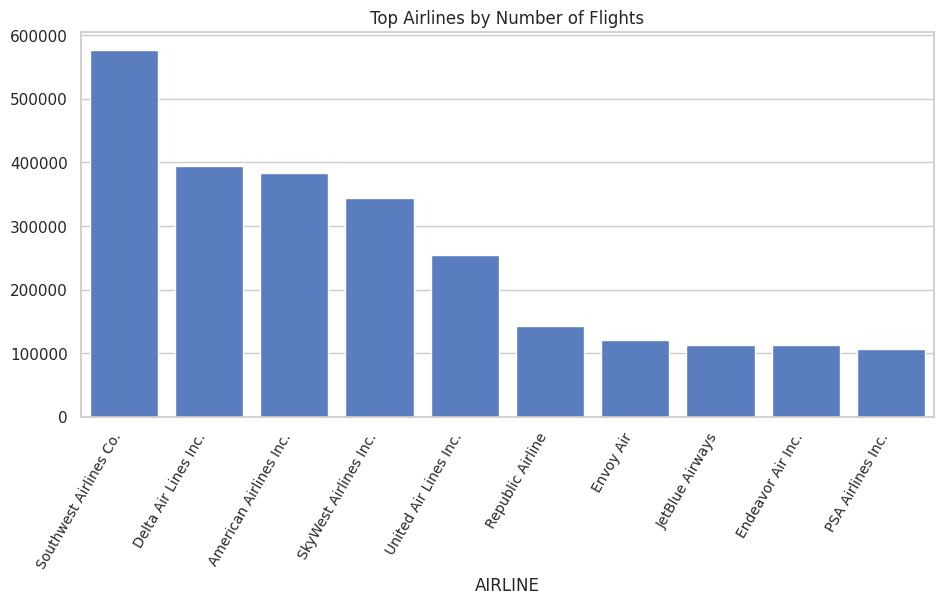

In [ ]:
# 1. Top Airlines by Number of Flights
plt.figure(figsize=(11,5))
top_airlines = df['AIRLINE'].value_counts().head(10)
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.title("Top Airlines by Number of Flights")
plt.xticks(ha = 'right', rotation=60, fontsize=10)
plt.show()

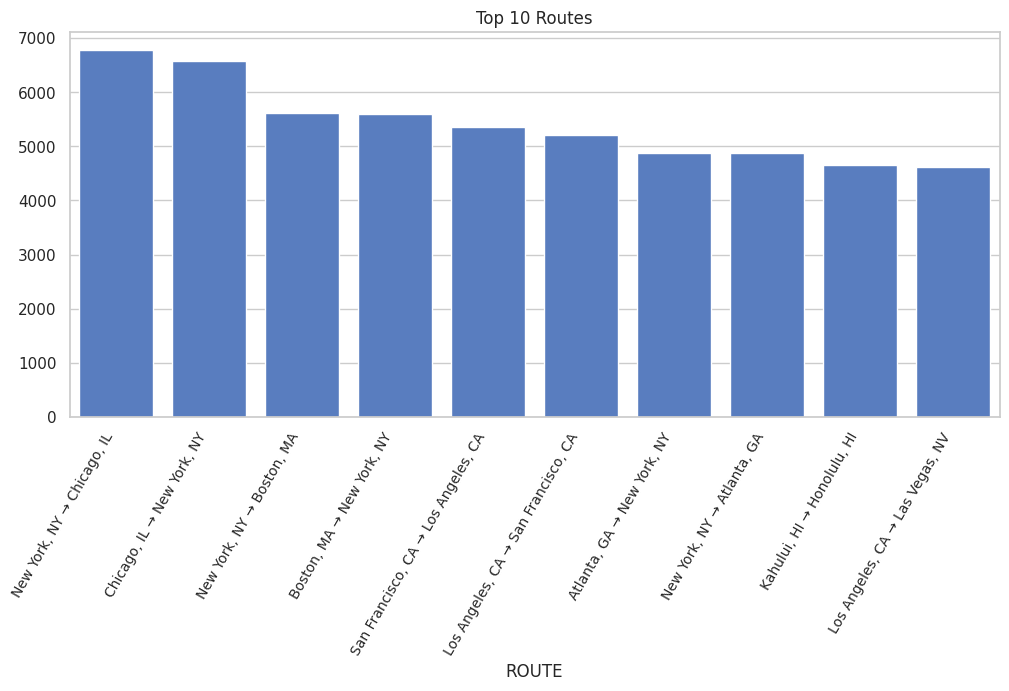

In [ ]:
# 2. Top Routes
plt.figure(figsize=(12,5))
top_routes = df['ROUTE'].value_counts().head(10)
sns.barplot(x=top_routes.index, y=top_routes.values)
plt.title("Top 10 Routes")
plt.xticks(ha='right', rotation=60, fontsize=10)
plt.show()

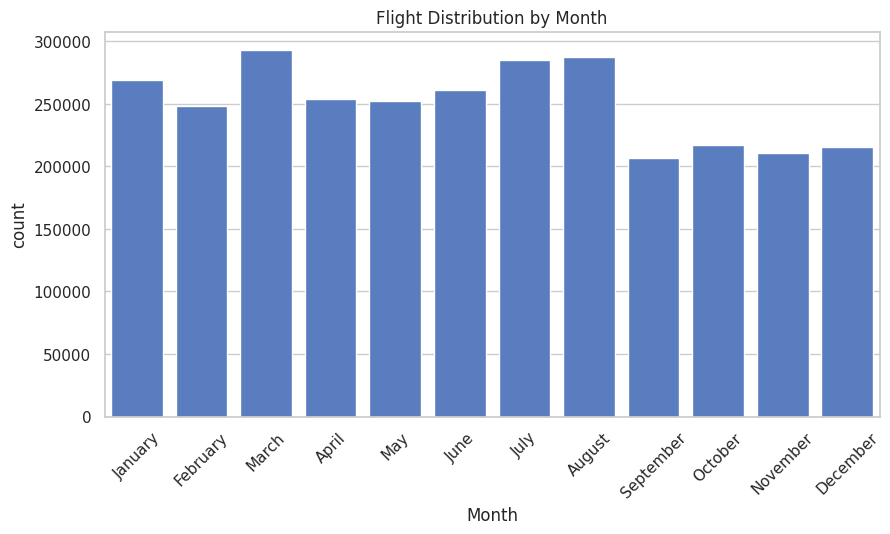

In [ ]:
# 3. Busiest Months
plt.figure(figsize=(10,5))
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
sns.countplot(data=df, x="Month", order=month_order)
plt.title("Flight Distribution by Month")
plt.xticks(rotation=45)
plt.show()

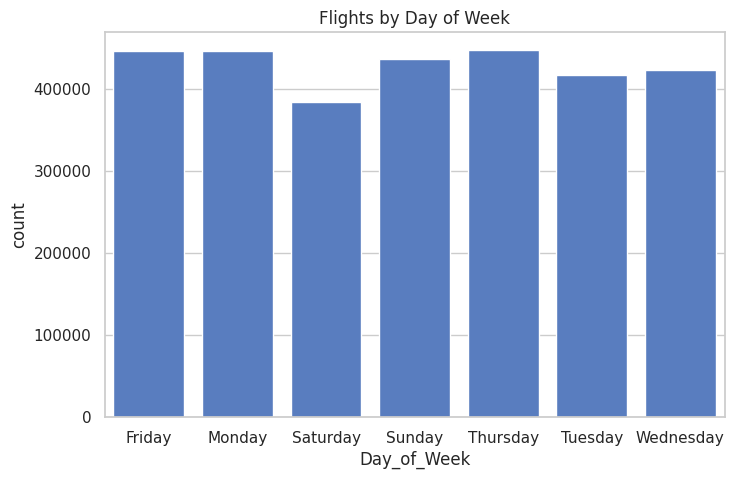

In [ ]:
# 4. Flight Distribution by Day of Week
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Day_of_Week")
plt.title("Flights by Day of Week")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 43 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FL_DATE                          datetime64[ns]
 1   AIRLINE                          object        
 2   AIRLINE_DOT                      object        
 3   AIRLINE_CODE                     object        
 4   DOT_CODE                         int16         
 5   FL_NUMBER                        int16         
 6   ORIGIN (IATA CODE)               object        
 7   ORIGIN_CITY                      object        
 8   DEST (IATA CODE)                 object        
 9   DEST_CITY                        object        
 10  CRS_DEP_TIME                     object        
 11  DEP_TIME                         object        
 12  DEP_DELAY                        float32       
 13  TAXI_OUT                         object        
 14  WHEELS_OFF                       o

In [ ]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN (IATA CODE),ORIGIN_CITY,DEST (IATA CODE),DEST_CITY,...,DELAY_DUE_NAS_in_mins,DELAY_DUE_SECURITY_in_mins,DELAY_DUE_LATE_AIRCRAFT_in_mins,Delay_Reasons,Total_Delay_in_Time,DELAYED,ROUTE,ORIGIN_STATE,DEST_STATE,DISTANCE_CATEGORY
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,Fort Lauderdale,EWR,Newark,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Fort Lauderdale, FL → Newark, NJ",Florida,New Jersey,Long
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,Minneapolis,SEA,Seattle,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Minneapolis, MN → Seattle, WA",Minnesota,Washington,Long
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,Denver,MSP,Minneapolis,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Denver, CO → Minneapolis, MN",Colorado,Minnesota,Medium
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,Minneapolis,SFO,San Francisco,...,00:24:00,00:00:00,00:00:00,Delay Due To Nas,00:24:00,Delay,"Minneapolis, MN → San Francisco, CA",Minnesota,California,Long
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,Orlando,DFW,Dallas/Fort Worth,...,00:00:00,00:00:00,00:00:00,NaN,00:00:00,No Delay,"Orlando, FL → Dallas/Fort Worth, TX",Florida,Texas,Long


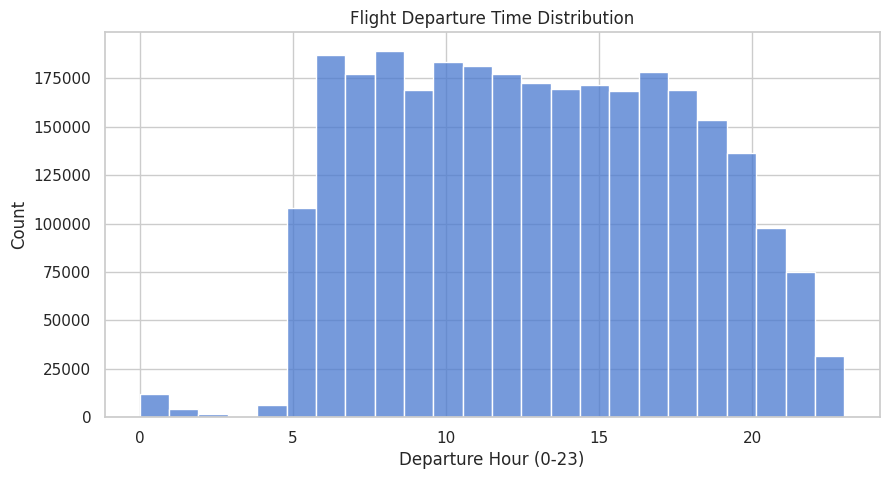

In [ ]:
df['DEP_TIME'] = pd.to_datetime(df['DEP_TIME'], format='%H:%M:%S', errors='coerce')
df['DEP_HOUR'] = df['DEP_TIME'].dt.hour
plt.figure(figsize=(10,5))
sns.histplot(df['DEP_HOUR'].dropna(), bins=24, kde=False)
plt.title("Flight Departure Time Distribution")
plt.xlabel("Departure Hour (0-23)")
plt.show()


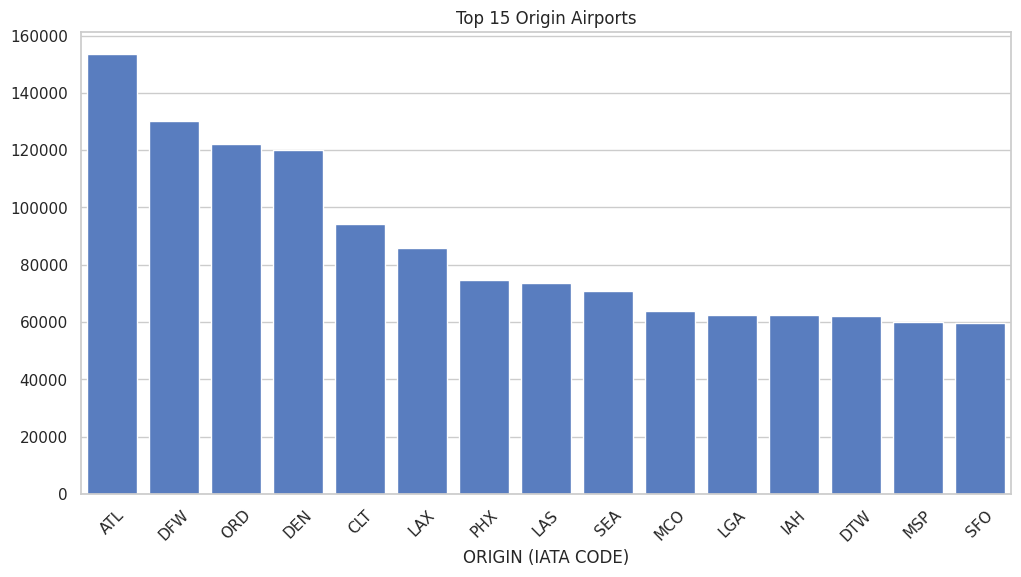

In [ ]:
# 6. Distribution by Airports
plt.figure(figsize=(12,6))
top_airports = df['ORIGIN (IATA CODE)'].value_counts().head(15)
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title("Top 15 Origin Airports")
plt.xticks(rotation=45)
plt.show()

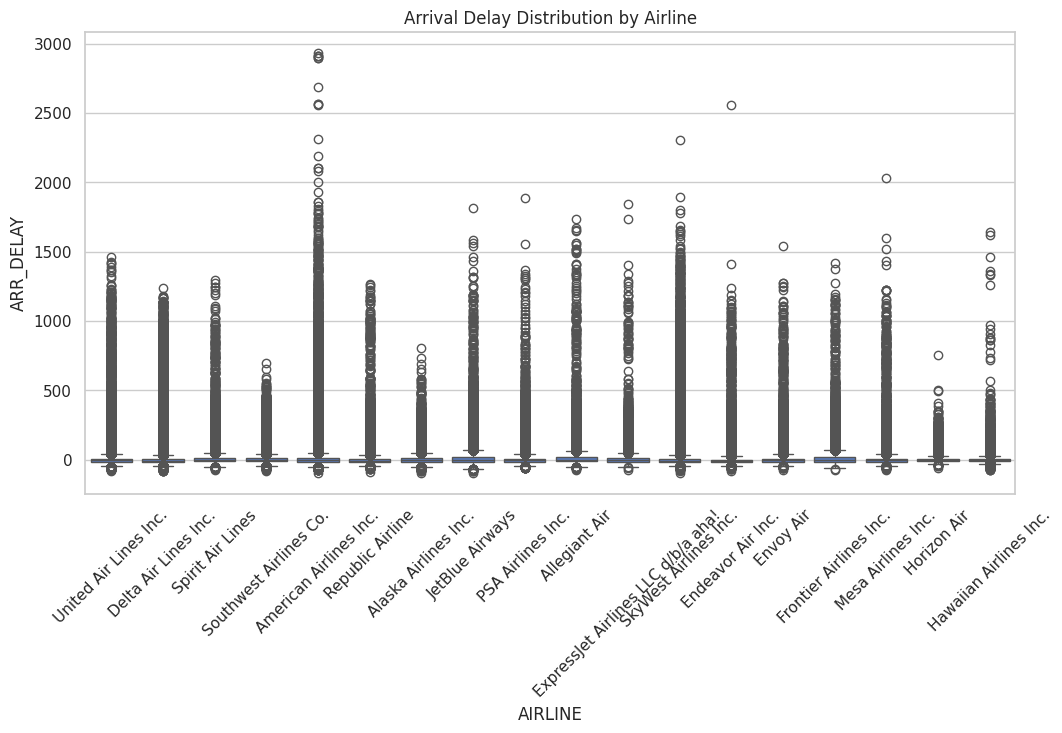

In [ ]:
# 7. Boxplot of Arrival Delay by Airline
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="AIRLINE", y="ARR_DELAY")
plt.title("Arrival Delay Distribution by Airline")
plt.xticks(rotation=45)
plt.show()